In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv('../datasets/Churn_Modelling.csv', index_col='RowNumber')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [73]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

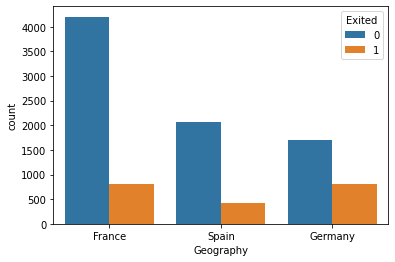

In [75]:
sns.countplot(x='Geography',hue='Exited',data=df)
plt.show()

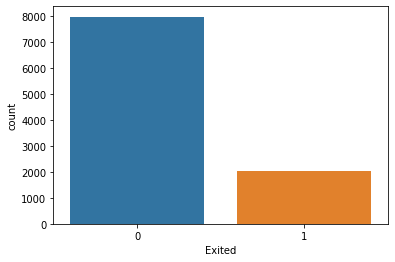

In [76]:
sns.countplot(x='Exited',data=df)
plt.show()

In [97]:
class_count_0,class_count_1=df.Exited.value_counts()

In [98]:
class_0=df[df.Exited==0]
class_1=df[df.Exited==1]

In [99]:
print("Class 0",class_0.shape)
print("Class 1",class_1.shape)

Class 0 (7963, 13)
Class 1 (2037, 13)


In [100]:
new_c0=class_0.sample(class_count_1,replace=True)
new_c0

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
4674,15764661,Wang,644,France,Male,33,2,0.00,1,1,0,96420.58,0
3296,15654296,Estrada,754,Spain,Female,19,9,0.00,1,1,0,189641.11,0
8682,15746338,Onyekachukwu,565,France,Female,40,2,0.00,2,1,1,129956.13,0
7288,15633944,McKay,644,Spain,Male,32,3,136659.74,1,1,1,14187.78,0
9887,15719541,Flannagan,675,Spain,Male,31,2,90826.27,2,1,0,60270.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,15778830,Dellucci,841,France,Male,31,2,0.00,2,1,0,173240.52,0
2225,15691723,Chukwudi,631,Spain,Male,55,9,99685.06,1,1,0,114474.98,0
2993,15786993,Lung,810,France,Female,51,5,0.00,2,0,1,184524.74,0


In [101]:
new_c0.Exited.value_counts()

0    2037
Name: Exited, dtype: int64

In [102]:
ndf=pd.concat([class_1, new_c0], ignore_index=True)
ndf.Exited.value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

In [103]:
geoEnc=OneHotEncoder(drop='first')
gdummies=geoEnc.fit_transform(ndf[['Geography']]).toarray()

genderEnc=LabelEncoder()
ndf.Gender=genderEnc.fit_transform(ndf.Gender)

gdummies

array([[0., 0.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 0.],
       [0., 1.],
       [1., 0.]])

In [104]:
ndf.drop(['Geography','Surname','CustomerId'],axis=1, inplace=True)

In [105]:
ndf.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,502,0,42,8,159660.80,3,1,0,113931.57,1
2,645,1,44,8,113755.78,2,1,0,149756.71,1
3,376,0,29,4,115046.74,4,1,0,119346.88,1
4,653,1,58,1,132602.88,1,1,0,5097.67,1


In [106]:
data = np.append(gdummies, ndf.values, axis=1)
data.shape

(4074, 12)

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [108]:
x=data[:,:-1]
y=data[:,-1]
scale=StandardScaler()
scaledx=scale.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.2, random_state=0)

In [109]:
print(xtrain.shape, ytrain.shape)

(3259, 11) (3259,)


In [110]:
xtrain.shape[1]

11

## Create a ANN architecture

In [111]:
classifier=tf.keras.models.Sequential()

In [112]:
classifier.add(tf.keras.layers.Dense(units=6, activation=tf.keras.activations.relu, input_dim=xtrain.shape[1]))
classifier.add(tf.keras.layers.Dense(units=6, activation= tf.keras.activations.relu))
classifier.add(tf.keras.layers.Dense(units=1, activation= tf.keras.activations.sigmoid))

## Compile the model

In [113]:
classifier.compile(
                    optimizer=tf.keras.optimizers.Adam(),
                    loss=tf.keras.losses.binary_crossentropy,
                    metrics=[tf.keras.metrics.binary_accuracy]
                    )
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## Training the ann

In [114]:
tensorboard_callback = tf.keras.callbacks.TensorBoard('ann_logs',histogram_freq=1)

In [115]:
history = classifier.fit(xtrain, ytrain, batch_size=10, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
326/326 [==============================] - 3s 5ms/step - loss: 783.4079 - binary_accuracy: 0.5363
Epoch 2/20
326/326 [==============================] - 1s 2ms/step - loss: 23.6785 - binary_accuracy: 0.5441
Epoch 3/20
326/326 [==============================] - 1s 2ms/step - loss: 5.6523 - binary_accuracy: 0.5035
Epoch 4/20
326/326 [==============================] - 1s 2ms/step - loss: 4.5677 - binary_accuracy: 0.5244
Epoch 5/20
326/326 [==============================] - 1s 2ms/step - loss: 5.3031 - binary_accuracy: 0.5290
Epoch 6/20
326/326 [==============================] - 1s 2ms/step - loss: 6.5097 - binary_accuracy: 0.5510
Epoch 7/20
326/326 [==============================] - 1s 2ms/step - loss: 5.7324 - binary_accuracy: 0.5580
Epoch 8/20
326/326 [==============================] - 1s 3ms/step - loss: 4.1121 - binary_accuracy: 0.5398
Epoch 9/20
326/326 [==============================] - 1s 2ms/step - loss: 4.4003 - binary_accuracy: 0.5357
Epoch 10/20
326/326 [=============

In [96]:
classifier.evaluate(xtest, ytest)

100/100 [==============================] - 3s 2ms/step - loss: 0.6930 - binary_accuracy: 0.4953


[0.6930127739906311, 0.49529188871383667]